# Homework 01 - Nicholas Petr 

### A. Guess the solution. Plot the constraints and the objective function. Justify your guess.

#### My guess for maximizing the listed objective function is setting x1 = 1 and x2 = 0. 

#### My justification for this guess is due to the fact that the only difference between this objective function and the objective function identified within our class example is that we take 0.25 of x2 instead of x1. Because all constraints remain the same and we do not add any additional variables to the original objective functions, I am making the assumption that we will simply flip the values for x1 and x2 from the example objective function.

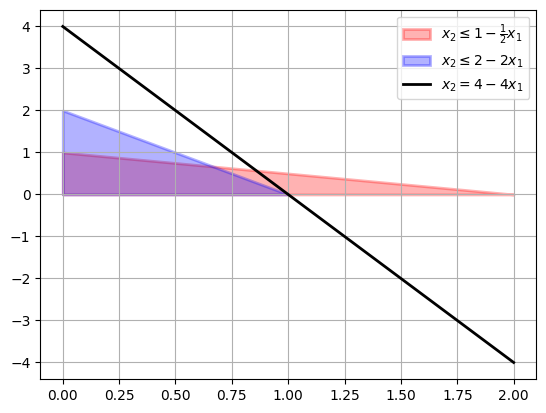

In [1]:
using PyPlot
clf();

x1 = collect(0:0.1:2);
x2a = 1 .- 0.5*x1;
x2b = ifelse.(2 .- 2*x1 .>=0, 2 .- 2*x1, NaN);
x2c = 4 .- 4*x1;

fig, ax = subplots();
ax.fill_between(x1,x2a,color="red",linewidth=2,label=L"x_{2} \leq 1 - \frac{1}{2}x_{1}",alpha=0.3);
ax.legend(loc="upper right");
ax.fill_between(x1,x2b,color="blue",linewidth=2,label=L"x_{2} \leq 2 - 2x_{1}",alpha=0.3);
ax.legend(loc="upper right");
ax.plot(x1,x2c,color="black",linewidth=2,label=L"x_{2} = 4 - 4x_{1}",alpha=1);
ax.legend(loc="upper right");
ax.grid(true);

### B. Using Julia define and solve the above problem 'as is'.

In [2]:
using JuMP, GLPK

# NOTE: You can use GLPK or Clp. Just needed to remove the with_optimizer command from example
myModel = Model(GLPK.Optimizer)
#myModel = Model(Clp.Optimizer)

@variable(myModel, x1 >= 0)
@variable(myModel, x2 >= 0)
@constraint(myModel, 0.5*x1 + x2 <= 1)
@constraint(myModel, 2*x1 + x2 <= 2)
@objective(myModel, Max, x1+(0.25*x2))
print(myModel)

In [3]:
@time begin
    status = optimize!(myModel)
end
println("Objective value: ", JuMP.objective_value(myModel))
println("x1 = ", JuMP.value(x1))
println("x2 = ", JuMP.value(x2))

  1.745744 seconds (5.36 M allocations: 398.344 MiB, 6.81% gc time, 99.96% compilation time)
Objective value: 1.0
x1 = 1.0
x2 = 0.0


### C. Rewrite it in the standard form.

#### Maximize x1 + (0.25*x2)

#### Subject to:
#### (0.5*x1) + x2 + x3 = 1
#### (2*x1) + x2 + x4 = 2
#### x1>=0, x2>=0, x3>=0, x4>=0

### D. Using Julia define and solve the above problem in the standard form.

In [4]:
using JuMP, Clp

#myModel = Model(with_optimizer(GLPK.Optimizer))
myModel_standard = Model(Clp.Optimizer)
@variable(myModel_standard, x1 >= 0)
@variable(myModel_standard, x2 >= 0)
@variable(myModel_standard, x3 >= 0)
@variable(myModel_standard, x4 >= 0)
@constraint(myModel_standard,(0.5*x1) + x2 + x3 == 1)
@constraint(myModel_standard, (2*x1) + x2 + x4 == 2)
@objective(myModel_standard, Max, x1+(0.25*x2))
print(myModel_standard)

In [5]:
@time begin
    status = optimize!(myModel_standard)
end
println("Objective value: ", JuMP.objective_value(myModel_standard))
println("x1 = ", JuMP.value(x1))
println("x2 = ", JuMP.value(x2))
println("x3 = ", JuMP.value(x3))
println("x4 = ", JuMP.value(x4))

  1.476357 seconds (5.03 M allocations: 282.971 MiB, 5.15% gc time, 99.91% compilation time)
Objective value: 1.0
x1 = 1.0
x2 = 0.0
x3 = 0.5
x4 = 0.0
Coin0506I Presolve 2 (0) rows, 2 (-2) columns and 4 (-2) elements
Clp0006I 0  Obj -0 Dual inf 1.249998 (2)
Clp0006I 1  Obj 1
Clp0000I Optimal - objective value 1
Coin0511I After Postsolve, objective 1, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 1 - 1 iterations time 0.002, Presolve 0.00


### E. Compare the solutions in item B and D.

##### Because we add a slack variable to each of the constraints to convert it to standard form, we have x1, x2, x3, and x4 for solution D instead of just x1 and x2 for solution B in matrix form. 

#### In solution B, we maximize the objective funtion when x1 = 1 and x2 = 0. In solution D, we maximize the objective function when x1 = 1, x2 = 0, x3 = 0.5 and x4 = 0. 

#### As indicated in the difference in solutions between B and D, the inclusion of the slack variables when converting the probelm to standard form leads to a slightly different solution. 

### F. Rework items A and B if the objective function is  x1+x2 .

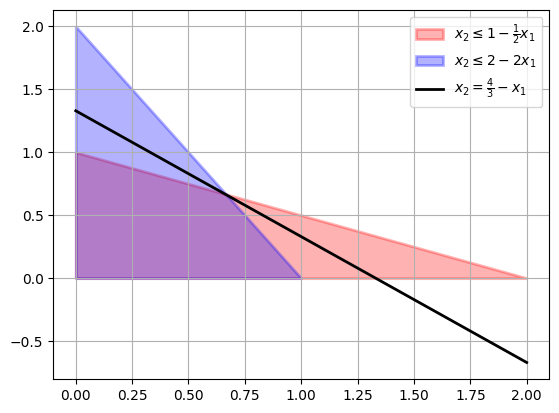

In [6]:
using PyPlot
clf();

x1 = collect(0:0.1:2);
x2a = 1 .- 0.5*x1;
x2b = ifelse.(2 .- 2*x1 .>=0, 2 .- 2*x1, NaN);
#x2c = 4/3. - x1;
x2c =1.33 .- x1

fig, ax = subplots();
ax.fill_between(x1,x2a,color="red",linewidth=2,label=L"x_{2} \leq 1 - \frac{1}{2}x_{1}",alpha=0.3);
ax.legend(loc="upper right");
ax.fill_between(x1,x2b,color="blue",linewidth=2,label=L"x_{2} \leq 2 - 2x_{1}",alpha=0.3);
ax.legend(loc="upper right");
ax.plot(x1,x2c,color="black",linewidth=2,label=L"x_{2} = \frac{4}{3} - x_{1}",alpha=1);
ax.legend(loc="upper right");
ax.grid(true);


In [7]:
using JuMP, GLPK

myModel_adjusted = Model(GLPK.Optimizer)
@variable(myModel_adjusted, x1 >= 0)
@variable(myModel_adjusted, x2 >= 0)
@constraint(myModel_adjusted, 0.5*x1 + x2 <= 1)
@constraint(myModel_adjusted, 2*x1 + x2 <= 2)
@objective(myModel_adjusted, Max, x1+x2)
print(myModel_adjusted)

In [8]:
@time begin
    status = optimize!(myModel_adjusted)
end
println("Objective value: ", JuMP.objective_value(myModel_adjusted))
println("x1 = ", JuMP.value(x1))
println("x2 = ", JuMP.value(x2))

  0.022130 seconds (12.23 k allocations: 661.917 KiB, 98.80% compilation time)
Objective value: 1.3333333333333335
x1 = 0.6666666666666667
x2 = 0.6666666666666666
